In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of parameters: 44382
Training ...


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:693: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch._C._nn.max_pool2d_with_indices(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch [1 / 1] average reconstruction error: 0.053171


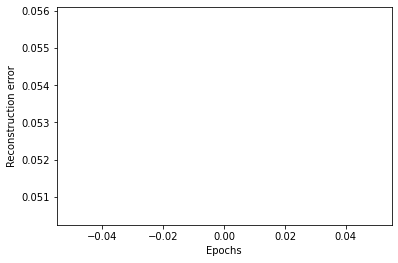

In [ ]:
#importing libraries
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import random
import torch.nn.functional as F

from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
import torchvision.datasets as dset
from torchvision.utils import save_image
import torchvision.utils as vutils
from torchsummary import summary
from IPython import display
from program1d_v2_ import model

In [ ]:
#device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
train_dataroot1 = "/content/drive/MyDrive/minorproject_dataset_2/fore_ground_blur/train"

train_dataset1 = dset.ImageFolder(root=train_dataroot1,
                           transform=transforms.Compose([transforms.Resize(size=(128,128)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

train_dataloader1 = torch.utils.data.DataLoader(train_dataset1, batch_size=1,
                                         shuffle=True)


test_dataroot1 = "/content/drive/MyDrive/minorproject_dataset_2/fore_ground_blur/test"

test_dataset1 = dset.ImageFolder(root=test_dataroot1,
                           transform=transforms.Compose([transforms.Resize(size=(128,128)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

test_dataloader1 = torch.utils.data.DataLoader(test_dataset1, batch_size=1,
                                         shuffle=False)


train_dataroot2 = "/content/drive/MyDrive/minorproject_dataset_2/back_ground_blur/train"

train_dataset2 = dset.ImageFolder(root=train_dataroot2,
                           transform=transforms.Compose([transforms.Resize(size=(128,128)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

train_dataloader2 = torch.utils.data.DataLoader(train_dataset2, batch_size=1,
                                         shuffle=True)


test_dataroot2 = "/content/drive/MyDrive/minorproject_dataset_2/back_ground_blur/test"

test_dataset2 = dset.ImageFolder(root=test_dataroot2,
                           transform=transforms.Compose([transforms.Resize(size=(128,128)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

test_dataloader2 = torch.utils.data.DataLoader(test_dataset2, batch_size=1,
                                         shuffle=False)


train_dataroot3 = "/content/drive/MyDrive/minorproject_dataset_2/sharp/train"

train_dataset3 = dset.ImageFolder(root=train_dataroot2,
                           transform=transforms.Compose([transforms.Resize(size=(128,128)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

train_dataloader3 = torch.utils.data.DataLoader(train_dataset2, batch_size=1,
                                         shuffle=True)


test_dataroot3 = "/content/drive/MyDrive/minorproject_dataset_2/sharp/test"
test_dataset3 = dset.ImageFolder(root=test_dataroot2,
                           transform=transforms.Compose([transforms.Resize(size=(128,128)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

test_dataloader3 = torch.utils.data.DataLoader(test_dataset2, batch_size=1,
                                         shuffle=False)


In [ ]:
FILE = "/content/drive/My Drive/drill_model_save/trained_model.pt"


In [ ]:
lmodel = torch.load(FILE)

In [ ]:
lmodel.eval()

Autoencoder(
  (conv1): Conv2d(3, 9, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(9, 27, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(27, 81, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (maxunpool1): MaxUnpool2d(kernel_size=(2, 2), stride=(2, 2), padding=(0, 0))
  (unconv1): ConvTranspose2d(81, 27, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxunpool2): MaxUnpool2d(kernel_size=(2, 2), stride=(2, 2), padding=(0, 0))
  (unconv2): ConvTranspose2d(27, 9, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (unconv3): ConvTranspose2d(9, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [ ]:
train_images_good=len(train_dataloader1)
print(train_images_good)
test_images_good=len(test_dataloader1)
print(test_images_good)

train_images_average=len(train_dataloader2)
print(train_images_average)
test_images_average=len(test_dataloader2)
print(test_images_average)

train_images_bad=len(train_dataloader3)
print(train_images_good)
test_images_bad=len(test_dataloader3)
print(test_images_bad)

40
20
40
20
40
20


Reconstructed images


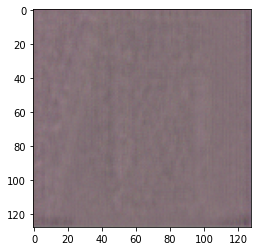

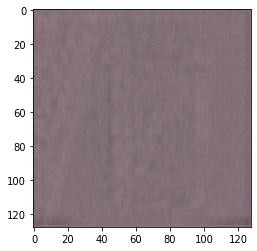

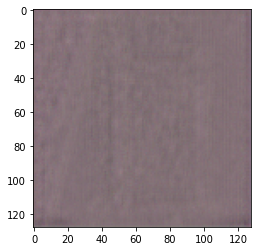

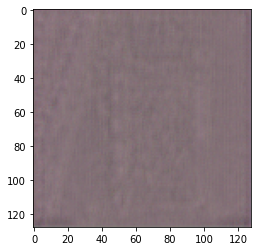

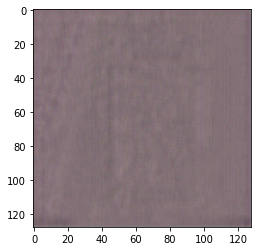

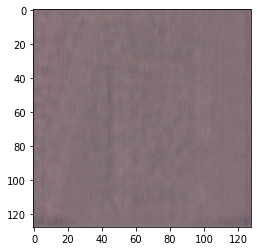

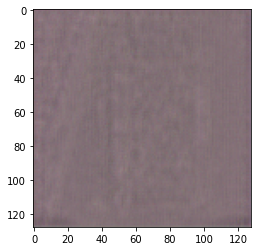

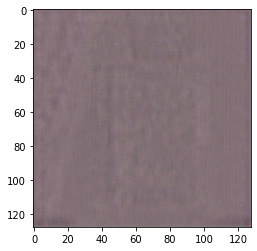

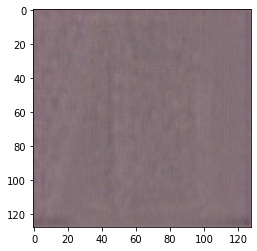

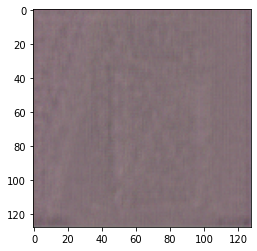

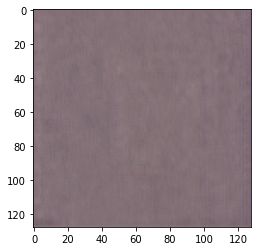

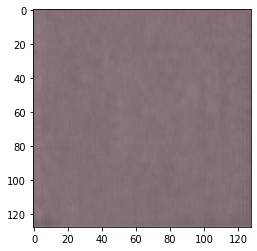

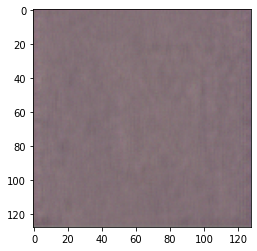

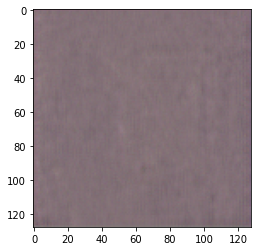

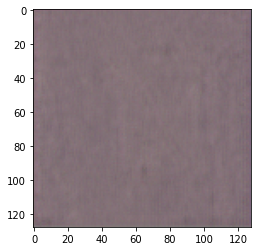

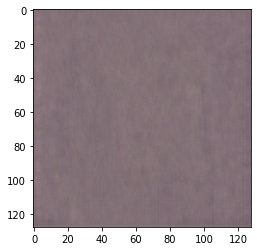

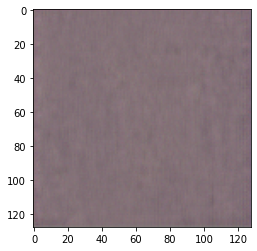

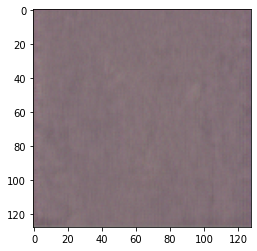

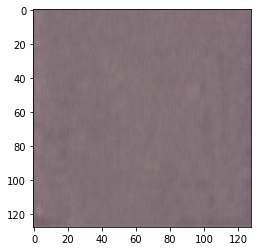

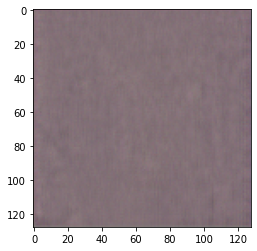

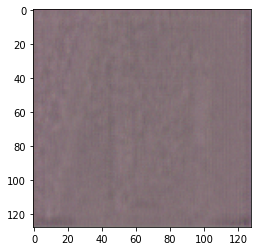

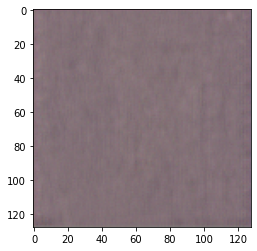

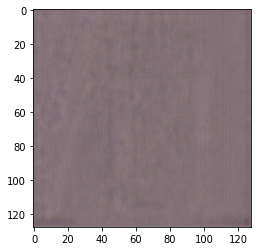

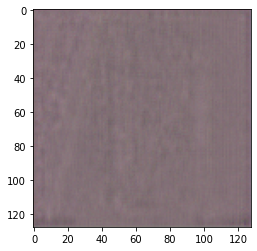

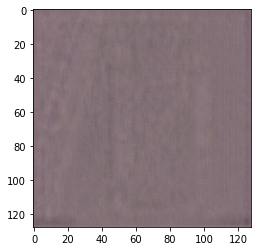

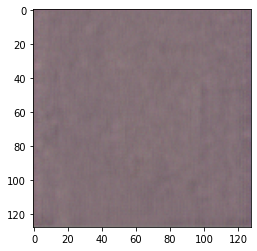

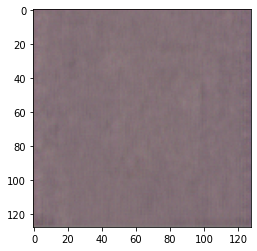

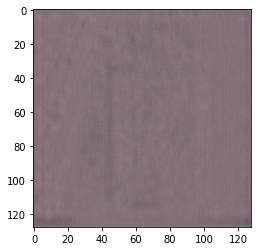

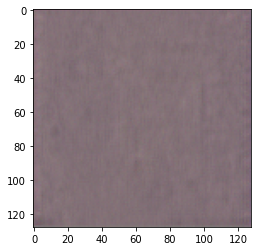

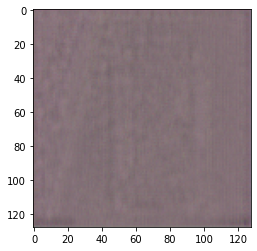

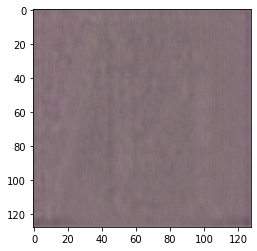

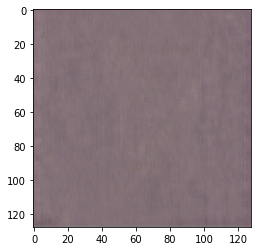

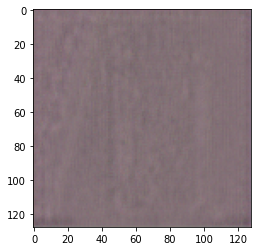

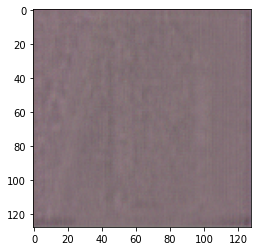

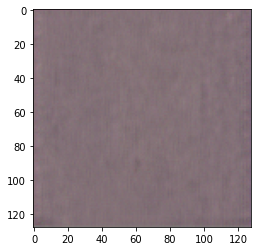

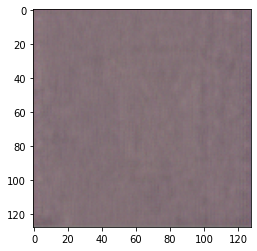

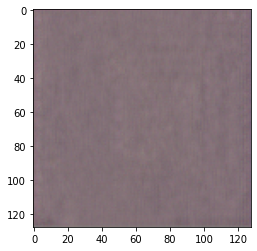

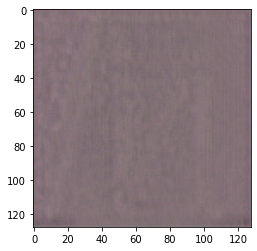

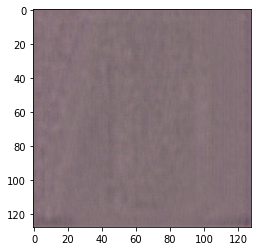

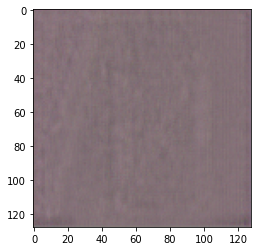

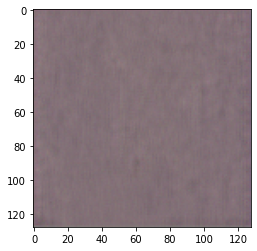

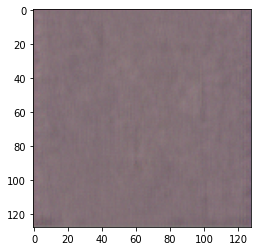

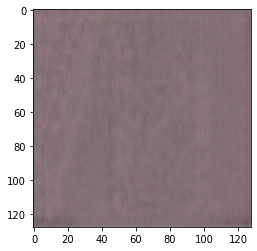

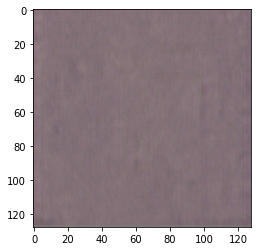

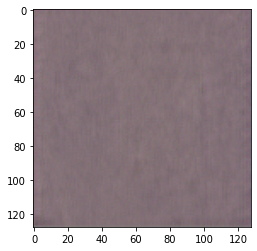

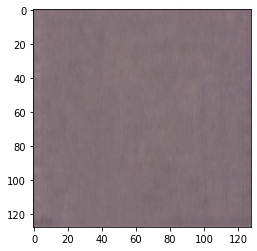

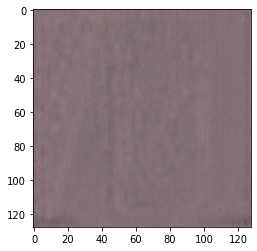

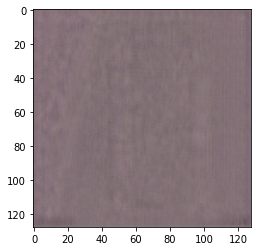

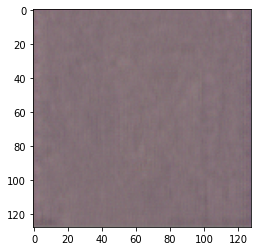

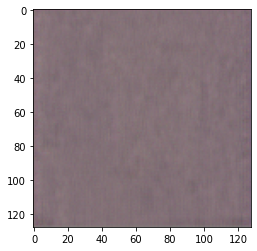

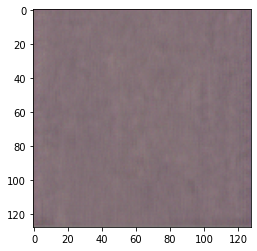

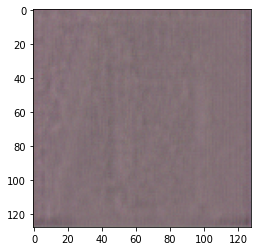

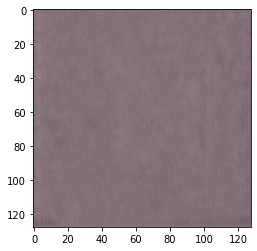

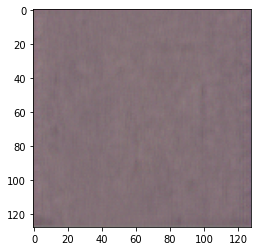

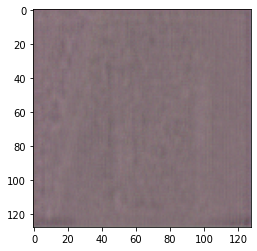

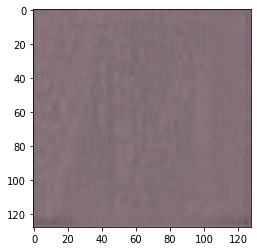

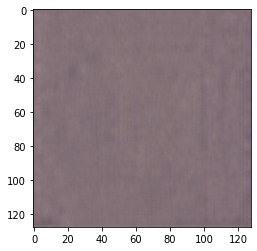

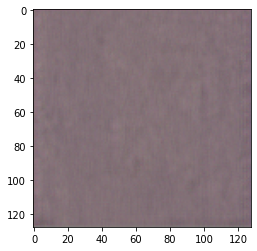

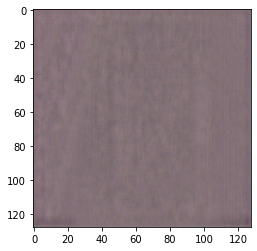

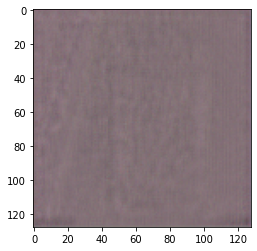

In [ ]:
#testing again
#set to evaluation mode
plt.ion()

def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    return x
 
list1=[]
list2=[]
list3=[]

# autoencoder reconstruction

print('Reconstructed images')

with torch.no_grad():
  for count in range(1,test_images_good+1):

    loadlatent=torch.load("/content/drive/MyDrive/minor_project_save/test/blurs/fore_ground_blur/Latent_{}.txt".format(count))
    loadI1=torch.load("/content/drive/MyDrive/minor_project_save/test/blurs/fore_ground_blur/I1_{}.txt".format(count)) 
    loadI2=torch.load("/content/drive/MyDrive/minor_project_save/test/blurs/fore_ground_blur/I2_{}.txt".format(count))
  
    image_batch_recon=lmodel.Decoder(loadlatent, loadI1, loadI2)
    list1.append(image_batch_recon)
    image_batch_recon = image_batch_recon.cpu()
    image_batch_recon = to_img(image_batch_recon)
    np_imagegrid = torchvision.utils.make_grid(image_batch_recon[:24], 10, 5).numpy()
    plt.imshow(np.transpose(np_imagegrid, (1, 2, 0)))
    plt.show()

  for count in range(1,train_images_good+1):

    loadlatent=torch.load("/content/drive/MyDrive/minor_project_save/train/blurs/fore_ground_blur/Latent_{}.txt".format(count))
    loadI1=torch.load("/content/drive/MyDrive/minor_project_save/train/blurs/fore_ground_blur/I1_{}.txt".format(count))
    loadI2=torch.load("/content/drive/MyDrive/minor_project_save/train/blurs/fore_ground_blur/I2_{}.txt".format(count))

    image_batch_recon=lmodel.Decoder(loadlatent, loadI1, loadI2)
    list1.append(image_batch_recon)

    image_batch_recon = image_batch_recon.cpu()
    image_batch_recon = to_img(image_batch_recon)
    np_imagegrid = torchvision.utils.make_grid(image_batch_recon[:24], 10, 5).numpy()
    plt.imshow(np.transpose(np_imagegrid, (1, 2, 0)))
    plt.show()
